<a href="https://colab.research.google.com/github/johanasev/Teoria-de-Lenguajes/blob/main/Practica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practica 1 - Teoría de Lenguajes y Laboratorio**

Angi Sirley Hoyos - CC: 1001481035<br>
Johana Sevillano - CC: 1004189386<br>




Se realiza los algoritmos de ordenamiento con un contador de comparaciones.

In [ ]:
def bubble_sort(arr):
    n = len(arr)
    cont = 0
    # Iterar a través de todos los elementos del arreglo
    for i in range(n):
        # Últimos i elementos ya están en su lugar, no es necesario compararlos
        for j in range(0, n-i-1):
            # Intercambiar si el elemento encontrado es mayor que el siguiente elemento
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                cont += 1

    return cont

# Ejemplo de uso
arr = [64, 34, 25, 12, 22, 11, 90]
comparaciones = bubble_sort(arr)

print("Arreglo ordenado:")
for i in range(len(arr)):
    print("%d" % arr[i], end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)

Arreglo ordenado:
11 12 22 25 34 64 90 
Número de comparaciones realizadas: 14


In [ ]:
def insertion_sort(arr):
    comparaciones = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        comparaciones += 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
            comparaciones += 1
        arr[j + 1] = key
    return comparaciones

# Ejemplo de uso
arr = [64, 34, 25, 12, 22, 11, 90]
comparaciones = insertion_sort(arr)

print("Arreglo ordenado:")
for i in range(len(arr)):
    print("%d" % arr[i], end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)

Arreglo ordenado:
11 12 22 25 34 64 90 
Número de comparaciones realizadas: 20


In [ ]:
def selection_sort(arr):
    n = len(arr)
    comparaciones = 0
    for i in range(n):
        # Encuentra el índice del mínimo elemento en el resto del arreglo
        min_idx = i
        for j in range(i+1, n):
            comparaciones += 1
            if arr[j] < arr[min_idx]:
                min_idx = j

        # Intercambia el mínimo elemento con el primero no ordenado
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

    return comparaciones

# Ejemplo de uso
arr = [64, 34, 25, 12, 22, 11, 90]
comparaciones = selection_sort(arr)

print("Arreglo ordenado:")
for i in range(len(arr)):
    print("%d" % arr[i], end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)

Arreglo ordenado:
11 12 22 25 34 64 90 
Número de comparaciones realizadas: 21


In [ ]:
def merge_sort(arr):
    comparaciones = [0]  # Utilizamos una lista para almacenar el número de comparaciones y mantener la referencia mutable

    def merge(arr, left, mid, right):
        left_part = arr[left:mid+1]
        right_part = arr[mid+1:right+1]

        i = j = 0
        k = left
        while i < len(left_part) and j < len(right_part):
            if left_part[i] <= right_part[j]:
                arr[k] = left_part[i]
                i += 1
            else:
                arr[k] = right_part[j]
                j += 1
            comparaciones[0] += 1
            k += 1

        while i < len(left_part):
            arr[k] = left_part[i]
            i += 1
            k += 1

        while j < len(right_part):
            arr[k] = right_part[j]
            j += 1
            k += 1

    def merge_sort_helper(arr, left, right):
        if left < right:
            mid = (left + right) // 2
            merge_sort_helper(arr, left, mid)
            merge_sort_helper(arr, mid+1, right)
            merge(arr, left, mid, right)

    merge_sort_helper(arr, 0, len(arr)-1)
    return comparaciones[0]

# Ejemplo de uso
arr = [64, 34, 25, 12, 22, 11, 90]
comparaciones = merge_sort(arr)

print("Arreglo ordenado:")
for element in arr:
    print(element, end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)

Arreglo ordenado:
11 12 22 25 34 64 90 
Número de comparaciones realizadas: 13


In [ ]:
def quick_sort(arr):
    comparaciones = [0]  # Utilizamos una lista para almacenar el número de comparaciones y mantener la referencia mutable

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            comparaciones[0] += 1
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def quick_sort_helper(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            quick_sort_helper(arr, low, pi - 1)
            quick_sort_helper(arr, pi + 1, high)

    quick_sort_helper(arr, 0, len(arr) - 1)
    return comparaciones[0]

# Ejemplo de uso
arr = [64, 34, 25, 12, 22, 11, 90]
comparaciones = quick_sort(arr)

print("Arreglo ordenado:")
for element in arr:
    print(element, end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)

Arreglo ordenado:
11 12 22 25 34 64 90 
Número de comparaciones realizadas: 19


In [ ]:
def heapify(arr, n, i, comparaciones):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        comparaciones[0] += 1
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest, comparaciones)

def heap_sort(arr):
    n = len(arr)
    comparaciones = [0]

    # Construir un montículo máximo
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, comparaciones)

    # Extraer elementos uno por uno
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0, comparaciones)

    return comparaciones[0]

# Ejemplo de uso
arr = [64, 34, 25, 12, 22, 11, 90]
comparaciones = heap_sort(arr)

print("Arreglo ordenado:")
for element in arr:
    print(element, end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)

Arreglo ordenado:
11 12 22 25 34 64 90 
Número de comparaciones realizadas: 8


Se agrega a los algoritmos de ordenamiento los tiempos de ejecución con diferentes fuentes de datos


In [ ]:
import time
import numpy as np
def bubble_sort(arr):
    n = len(arr)
    cont = 0
    # Iterar a través de todos los elementos del arreglo
    for i in range(n):
        # Últimos i elementos ya están en su lugar, no es necesario compararlos
        for j in range(0, n-i-1):
            # Intercambiar si el elemento encontrado es mayor que el siguiente elemento
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                cont += 1

    return cont

# Ejemplo de uso
arr = np.random.randint(1, 1000, size=150)

# Medir tiempo antes de la ejecución
start_time = time.time()

comparaciones = bubble_sort(arr)

# Medir tiempo después de la ejecución
end_time = time.time()

print("Arreglo ordenado:")
for i in range(len(arr)):
    print("%d" % arr[i], end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)
print("Tiempo de ejecución:", end_time - start_time, "segundos")

Arreglo ordenado:
18 28 50 51 57 66 77 82 94 114 117 125 129 130 133 136 136 149 151 153 156 158 160 167 177 190 212 219 223 236 266 271 282 283 284 299 303 305 310 325 327 330 330 338 341 361 365 377 389 391 404 408 416 416 425 427 429 435 438 443 446 457 465 484 489 492 492 503 505 516 526 536 536 541 545 557 574 600 604 605 609 611 615 615 621 625 626 627 631 633 636 639 645 655 657 675 678 715 721 723 731 732 742 751 752 754 764 768 768 772 775 778 785 787 791 799 805 815 822 833 835 837 839 846 856 860 862 872 875 889 890 893 909 922 931 935 954 962 963 967 971 971 972 977 981 986 987 999 999 999 
Número de comparaciones realizadas: 5683
Tiempo de ejecución: 0.01096796989440918 segundos


In [ ]:
import time
import numpy as np
def insertion_sort(arr):
    comparaciones = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        comparaciones += 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
            comparaciones += 1
        arr[j + 1] = key
    return comparaciones

# Ejemplo de uso
arr = np.random.randint(1, 1000, size=150)

# Medir tiempo antes de la ejecución
start_time = time.time()

comparaciones = insertion_sort(arr)

# Medir tiempo después de la ejecución
end_time = time.time()

print("Arreglo ordenado:")
for i in range(len(arr)):
    print("%d" % arr[i], end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)
print("Tiempo de ejecución:", end_time - start_time, "segundos")

Arreglo ordenado:
7 13 22 45 47 49 51 56 65 75 79 80 84 87 87 93 98 99 100 101 104 121 128 137 144 153 155 156 170 180 184 189 191 192 197 198 202 213 213 216 228 232 248 248 262 274 276 286 287 298 300 302 305 316 317 331 334 335 349 349 360 362 372 383 386 391 393 397 403 413 419 420 431 437 442 443 456 460 463 484 534 549 559 561 570 575 576 590 600 613 614 618 624 646 652 669 673 677 678 683 686 686 699 699 701 711 712 712 723 726 726 727 728 733 742 750 761 778 785 785 797 799 809 811 822 839 844 848 855 860 866 867 875 875 878 882 887 902 906 908 914 916 922 929 963 980 980 986 993 997 
Número de comparaciones realizadas: 6249
Tiempo de ejecución: 0.004561424255371094 segundos


In [ ]:
import time
import numpy as np
def selection_sort(arr):
    n = len(arr)
    comparaciones = 0
    for i in range(n):
        # Encuentra el índice del mínimo elemento en el resto del arreglo
        min_idx = i
        for j in range(i+1, n):
            comparaciones += 1
            if arr[j] < arr[min_idx]:
                min_idx = j

        # Intercambia el mínimo elemento con el primero no ordenado
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

    return comparaciones

# Ejemplo de uso
arr = np.random.randint(1, 1000, size=150)

# Medir tiempo antes de la ejecución
start_time = time.time()

comparaciones = selection_sort(arr)

# Medir tiempo después de la ejecución
end_time = time.time()

print("Arreglo ordenado:")
for i in range(len(arr)):
    print("%d" % arr[i], end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)
print("Tiempo de ejecución:", end_time - start_time, "segundos")

Arreglo ordenado:
8 9 11 43 44 69 72 86 87 103 104 111 114 115 117 121 122 127 135 140 140 153 154 155 162 171 172 184 184 191 195 199 200 203 208 211 217 217 219 228 234 243 247 252 280 283 288 315 315 317 321 326 335 338 343 344 368 372 374 375 380 392 403 406 412 417 418 427 438 438 443 443 443 462 468 470 471 479 487 488 490 495 497 505 511 518 519 523 528 530 532 551 553 561 564 567 594 596 598 607 621 622 626 628 630 651 653 654 659 667 676 693 696 699 700 705 717 718 723 724 745 751 755 772 774 777 794 802 807 810 837 837 838 852 860 861 875 885 907 909 914 934 949 960 961 974 979 982 982 996 
Número de comparaciones realizadas: 11175
Tiempo de ejecución: 0.007147312164306641 segundos


In [ ]:
import time
import numpy as np
def merge_sort(arr):
    comparaciones = [0]  # Utilizamos una lista para almacenar el número de comparaciones y mantener la referencia mutable

    def merge(arr, left, mid, right):
        left_part = arr[left:mid+1]
        right_part = arr[mid+1:right+1]

        i = j = 0
        k = left
        while i < len(left_part) and j < len(right_part):
            if left_part[i] <= right_part[j]:
                arr[k] = left_part[i]
                i += 1
            else:
                arr[k] = right_part[j]
                j += 1
            comparaciones[0] += 1
            k += 1

        while i < len(left_part):
            arr[k] = left_part[i]
            i += 1
            k += 1

        while j < len(right_part):
            arr[k] = right_part[j]
            j += 1
            k += 1

    def merge_sort_helper(arr, left, right):
        if left < right:
            mid = (left + right) // 2
            merge_sort_helper(arr, left, mid)
            merge_sort_helper(arr, mid+1, right)
            merge(arr, left, mid, right)

    # Medir tiempo antes de la ejecución
    start_time = time.time()

    merge_sort_helper(arr, 0, len(arr)-1)

    # Medir tiempo después de la ejecución
    end_time = time.time()

    return comparaciones[0], end_time - start_time

# Ejemplo de uso
arr = np.random.randint(1, 1000, size=150)
comparaciones, tiempo_ejecucion = merge_sort(arr)

print("Arreglo ordenado:")
for element in arr:
    print(element, end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)
print("Tiempo de ejecución:", tiempo_ejecucion, "segundos")

Arreglo ordenado:
8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 170 170 170 
Número de comparaciones realizadas: 626
Tiempo de ejecución: 0.0017399787902832031 segundos


In [ ]:
import time
import numpy as np
def quick_sort(arr):
    comparaciones = [0]  # Utilizamos una lista para almacenar el número de comparaciones y mantener la referencia mutable

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            comparaciones[0] += 1
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def quick_sort_helper(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            quick_sort_helper(arr, low, pi - 1)
            quick_sort_helper(arr, pi + 1, high)

    # Medir tiempo antes de la ejecución
    start_time = time.time()

    quick_sort_helper(arr, 0, len(arr) - 1)

    # Medir tiempo después de la ejecución
    end_time = time.time()

    return comparaciones[0], end_time - start_time

# Ejemplo de uso
arr = np.random.randint(1, 1000, size=150)
comparaciones, tiempo_ejecucion = quick_sort(arr)

print("Arreglo ordenado:")
for element in arr:
    print(element, end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)
print("Tiempo de ejecución:", tiempo_ejecucion, "segundos")

Arreglo ordenado:
16 25 37 40 49 52 55 56 70 73 76 82 84 86 103 116 124 130 131 133 140 147 162 169 169 170 170 181 182 184 191 198 214 226 227 234 243 249 254 255 264 265 270 270 280 283 293 298 304 320 322 329 337 340 349 357 361 373 376 387 390 410 412 412 427 427 431 433 435 436 438 439 451 454 468 468 475 482 486 493 511 521 530 538 538 539 539 540 543 544 545 557 566 570 616 645 648 654 660 663 669 675 686 692 697 702 707 716 719 726 728 740 740 741 755 763 764 775 779 790 803 807 816 818 823 826 826 839 841 842 852 852 852 855 857 863 885 895 895 913 938 954 955 964 975 989 991 992 992 993 
Número de comparaciones realizadas: 1129
Tiempo de ejecución: 0.0005712509155273438 segundos


In [ ]:
import time
import numpy as np
def heapify(arr, n, i, comparaciones):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        comparaciones[0] += 1
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest, comparaciones)

def heap_sort(arr):
    n = len(arr)
    comparaciones = [0]

    # Construir un montículo máximo
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, comparaciones)

    # Medir tiempo antes de la ejecución
    start_time = time.time()

    # Extraer elementos uno por uno
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0, comparaciones)

    # Medir tiempo después de la ejecución
    end_time = time.time()

    return comparaciones[0], end_time - start_time

# Ejemplo de uso
arr = np.random.randint(1, 1000, size=150)
comparaciones, tiempo_ejecucion = heap_sort(arr)

print("Arreglo ordenado:")
for element in arr:
    print(element, end=" ")

print("\nNúmero de comparaciones realizadas:", comparaciones)
print("Tiempo de ejecución:", tiempo_ejecucion, "segundos")

Arreglo ordenado:
19 29 48 49 52 64 68 69 70 82 82 104 119 123 131 147 148 157 170 176 178 182 182 185 190 193 199 208 209 210 225 226 228 234 234 239 240 249 267 277 283 285 294 308 316 328 332 333 334 337 340 346 354 355 359 364 367 391 395 399 442 445 450 451 451 452 466 485 489 490 503 503 504 533 534 539 540 541 541 552 562 577 579 580 596 599 602 610 620 631 638 639 646 668 669 675 677 688 707 708 710 712 718 724 739 740 741 745 755 765 766 773 785 789 793 797 802 804 811 834 838 840 842 843 848 851 863 863 865 867 868 888 890 893 894 897 904 916 927 935 946 948 953 962 966 966 968 977 979 981 
Número de comparaciones realizadas: 806
Tiempo de ejecución: 0.0009109973907470703 segundos


Enseguida se aplica la comparación gráfica de los resultados de los algoritmos entre número de comparaciones y tiempo de ejecución.

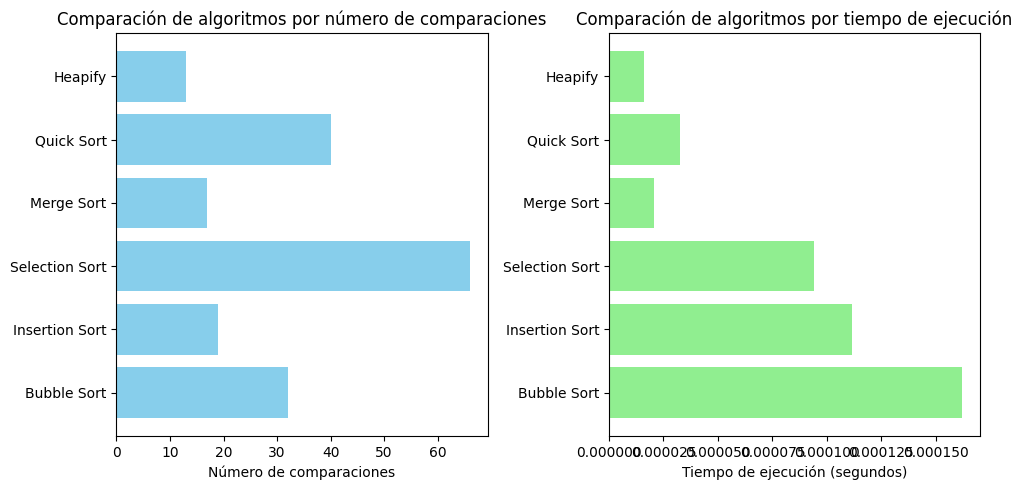

In [ ]:
import matplotlib.pyplot as plt

algoritmos = ['Bubble Sort', 'Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Heapify']
num_comparaciones = [32, 19, 66, 17, 40, 13]
tiempo_ejecucion = [0.0001621246337890625, 0.00011157989501953125, 9.393692016601562e-05, 2.0503997802734375e-05, 3.24249267578125e-05, 1.621246337890625e-05]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.barh(algoritmos, num_comparaciones, color='skyblue')
plt.xlabel('Número de comparaciones')
plt.title('Comparación de algoritmos por número de comparaciones')

plt.subplot(1, 2, 2)
plt.barh(algoritmos, tiempo_ejecucion, color='lightgreen')
plt.xlabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de algoritmos por tiempo de ejecución')

plt.tight_layout()
plt.show()


<table>
<tr>
<td> Algoritmo </td>
<td> Largo del Array <td>
<td> Comparaciones <td>
<td> Tiempo de ejecución <td>
</tr>
<tr>
<td> Bubble Sort </td>
<td> 10 <td>
<td> 32 <td>
<td> 0.0001621246337890625 <td>
</tr>
<tr>
<td> Insertion Sort </td>
<td> 6 <td>
<td> 19 <td>
<td> 0.00011157989501953125 <td>
</tr>
<tr>
<td> Selection Sort </td>
<td> 12 <td>
<td> 66 <td>
<td> 9.393692016601562e-05 <td>
</tr>
<tr>
<td> Merge Sort </td>
<td> 8 <td>
<td> 17 <td>
<td> 2.0503997802734375e-05 <td>
</tr>
<tr>
<td> Quick Sort </td>
<td> 12 <td>
<td> 40 <td>
<td> 3.24249267578125e-05 <td>
</tr>
<tr>
<td> Heapify </td>
<td> 9 <td>
<td> 13 <td>
<td> 1.621246337890625e-05 <td>
</tr>

</table>




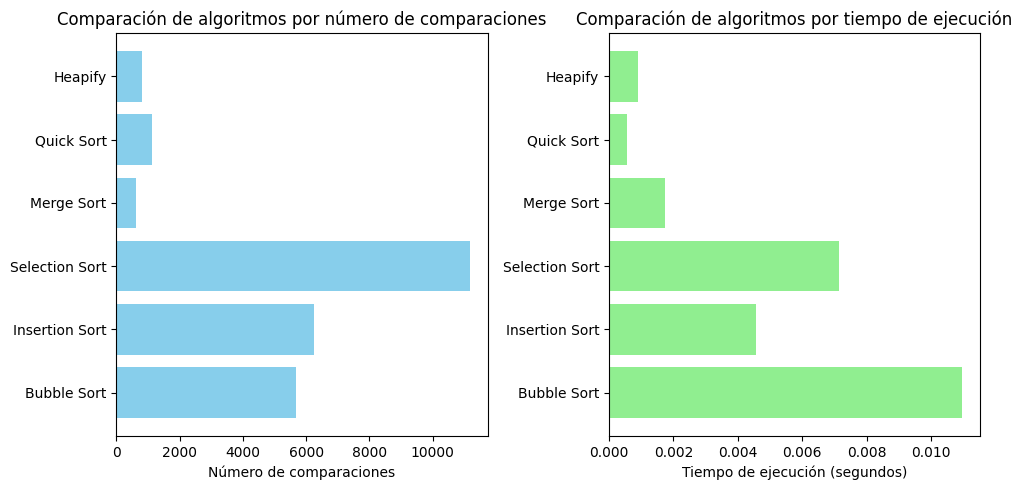

In [ ]:
import matplotlib.pyplot as plt

algoritmos = ['Bubble Sort', 'Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Heapify']
num_comparaciones = [5683, 6249, 11175, 626, 1129, 806]
tiempo_ejecucion = [0.01096796989440918, 0.004561424255371094, 0.007147312164306641, 0.0017399787902832031, 0.0005712509155273438, 0.0009109973907470703]

plt.figure(figsize=(10, 5))

# Gráfico de barras para comparar el número de comparaciones
plt.subplot(1, 2, 1)
plt.barh(algoritmos, num_comparaciones, color='skyblue')
plt.xlabel('Número de comparaciones')
plt.title('Comparación de algoritmos por número de comparaciones')

# Gráfico de barras para comparar el tiempo de ejecución
plt.subplot(1, 2, 2)
plt.barh(algoritmos, tiempo_ejecucion, color='lightgreen')
plt.xlabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de algoritmos por tiempo de ejecución')

plt.tight_layout()
plt.show()


**Análisis de resultados**

De los 3 métodos de ordenación que tienen menos de 10 posiciones en el array como son Insertion Sort, Merge Sort y Heapify, este último es mucho más eficiente globalmente en tiempo de ejecución y número de comparaciones. Por el contrario el Insertion sort aunque tienen menos posisciones en el array es el que mas comparaciones debe hacer y toma mas tiempo de ejecución siendo menos eficiente del grupo.

De los 3 restantes que tienen mas de 10 posiciones en el array que son Bubble sort, Selection sort y Quick sort este último es el que resulta más eficiente en cuentao a tiempo de ejecución con un número de comparaciones promedio, por el contrario el Bubble sort aunque es el que menos posiciones tiene en el array gasta mucho mas tiempo en ejecución sin emabrgo el número de comparaciones es el más pequeño.

En grandes volumenes de datos vemos que las gráficas tanto de número de comparaciones como de tiempo de ejecución presentan tendencias similares llegando a la conclusión de uso eficiente en los algoritmos Quick y Heapify destacando en tiempo de ejecución y Merge eb número de comparaciones.


